Context
High-quality financial data is expensive to acquire and is therefore rarely shared for free. Here I provide the full historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT. It's one of the best datasets of its kind you can obtain.

Content
The data (last updated 11/10/2017) is presented in CSV format as follows: Date, Open, High, Low, Close, Volume, OpenInt. Note that prices have been adjusted for dividends and splits.

Acknowledgements
This dataset belongs to me. I’m sharing it here for free. You may do with it as you wish.

Inspiration
Many have tried, but most have failed, to predict the stock market's ups and downs. Can you do any better?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
stock_us = pd.read_csv('gs.us.txt',sep=',',parse_dates=[0],usecols=['Date','Open'],index_col=0)

#### Lets do some basic checks in data

In [13]:
stock_us.shape

(4661, 1)

In [14]:
stock_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4661 entries, 1999-05-04 to 2017-11-10
Data columns (total 1 columns):
Open    4661 non-null float64
dtypes: float64(1)
memory usage: 72.8 KB


In [15]:
stock_us.dtypes

Open    float64
dtype: object

In [16]:
stock_us.describe([0.25,0.50,0.75,0.90]).transpose()

,count,mean,std,min,25%,50%,75%,90%,max
Open,4661.0,128.617729,47.634295,49.252,85.705,128.95,161.31,193.53,252.0


In [17]:
stock_us.isnull().sum()

Open    0
dtype: int64

#### Lets plot the data 

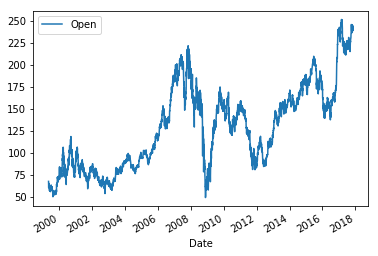

In [18]:
stock_us.plot()

#### Lets do smoothning to understand the trend clearly

In [19]:
stock_us_rolling = stock_us.rolling(window=1500).sum()

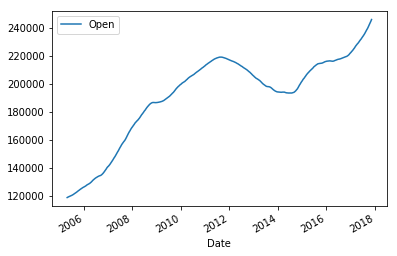

In [20]:
# We can see a up trend in the data
stock_us_rolling.plot()

#### Lets create an ACF & PACF to understand if our data is stationary

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1080x432 with 0 Axes>

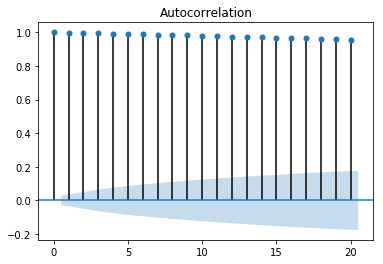

In [22]:
plt.figure(figsize=(15,6))
plot_acf(stock_us,lags=20);

<Figure size 1080x432 with 0 Axes>

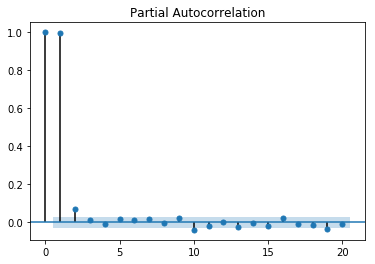

In [23]:
plt.figure(figsize=(15,6))
plot_pacf(stock_us,lags=20);

#### We can see a steady dicrease in the acf plot its an indication the data is not stationary

#### lets try differencing method to make the plot stationary and try to plot the data

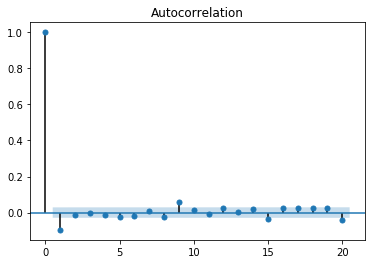

In [24]:
stock_us_stationary=stock_us.diff(periods=1)[1:]
plot_acf(stock_us_stationary,lags=20);

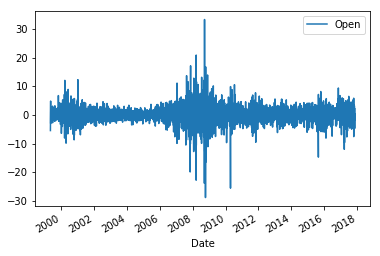

In [25]:
stock_us_stationary.plot()

#### Now we can see a fast decrease in the plot so this means its stationary now

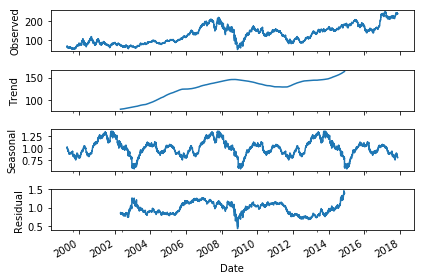

In [26]:
# Lets check the different components of the TimeSeries ie trend,seasionality,cycle,white noise
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(x =stock_us.Open,model='multiplicative', freq=1500).plot();

#### Lets create a base model for our time series

In [27]:
stock_us_shift = stock_us.shift(periods=1)
stock_us_base_df = pd.concat([stock_us,stock_us_shift],axis='columns')[1:]
stock_us_base_df.columns=['Actual','Predicted']
stock_us_base_df.head()

,Actual,Predicted
Date,,
1999-05-05,62.213,67.665
1999-05-06,60.542,62.213
1999-05-07,60.488,60.542
1999-05-10,65.331,60.488
1999-05-11,62.329,65.331


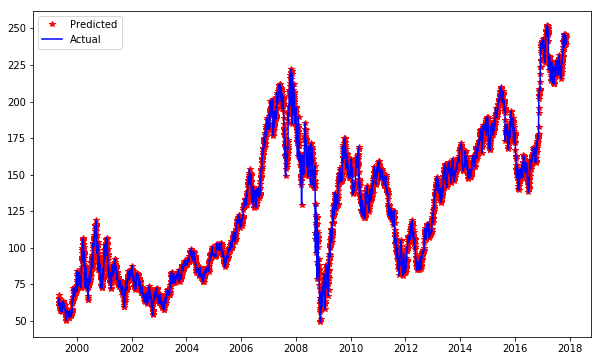

In [28]:
plt.figure(figsize=(10,6))
plt.plot(stock_us_base_df.Predicted,'*',c='red')
plt.plot(stock_us_base_df.Actual,c='blue')
plt.legend(['Predicted','Actual'])
# plt.yscale('log')
plt.show()

##### We can see that our base model is performing very well 

In [29]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(stock_us_base_df.Actual,stock_us_base_df.Predicted))

2.7864194776387867

In [32]:
# Splitting the data into train and test
train,test = stock_us[0:int(len(stock_us)*0.9)], stock_us[int(len(stock_us)*0.9):]

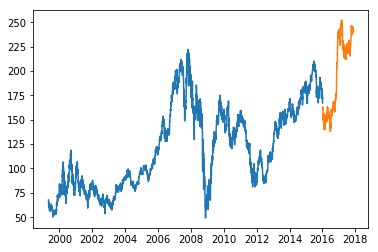

In [33]:
plt.plot(train)
plt.plot(test)

#### now lets try ARIMA

In [70]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
arima_model = ARIMA(train,(1,1,0)).fit()
arima_model_pred = arima_model.forecast(steps=467)[0]

In [71]:
np.sqrt(mean_squared_error(test,arima_model_pred))

41.69483894738014

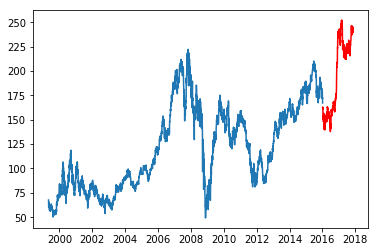

In [72]:
plt.plot(train.Open)
plt.plot(test.Open,'red')

#### We can assume that our base model is giving a good result

In [100]:
# import itertools
# p=d=q=range(0,10)
# pdq = list(itertools.product(p,d,q))

In [73]:
# list_1=[]
# for param in pdq:
#     try:
#         arima_model = ARIMA(train,order=param).fit()
#         arima_output = arima_model.forecast(steps=467)[0]
#         error = np.sqrt(mean_squared_error(test,arima_output))
#         list_1.append(error)
#     except:
# #         list_1.append(5000)
#         continue

In [74]:
# list_1